# Lecture 1 Introduction to Data Science

# What is Data Science?

Three correlated concepts: 
- Data Science
- Artificial Intelligence 
- Machine Learning

[Battle of the Data Science Venn Diagrams ](https://www.kdnuggets.com/2016/10/battle-data-science-venn-diagrams.html)

The original Venn diagram from Drew Conway:

<div>
<img src="./img/Data_Science_VD.png" width="300">
</div>

Another diagram from Steven Geringer:

<div>
<img src="./img/moz-screenshot-3-729576.png" width="400">
</div>

Another version:

<div>
<img src="./img/1_-XKVI5SAEpffNR7BusdvNQ.png" width="300">
</div>

Perhaps the reality should be:
<div>
<img src="./img/DataScienceDisciplines.png" width="400">
</div>
<div>
<img src="./img/tumblr_m74i4eR9Ym1qa0uujo1_1280.jpg" width="300">
</div>

[David Robinson's Auto-pilot example](http://varianceexplained.org/r/ds-ml-ai/):
- machine learning: **predict** whether there is a stop sign in the camera
- artificial intelligence: design the **action** of applying brakes (either by rules or from data)
- data science: provide the **insights** why the system does not work well after sunrise

**Peijie's Definition**:
Data Science is the science 
- *of* the data -- what
- *by* the data -- how
- *for* the data -- why

# Mathematics of Data 

### Representation of Data

What data do we have, and how to relate it with math objects?

#### **Tabular Data**

In [1]:
import pandas as pd
import numpy as np
df_house = pd.read_csv('./data/kc_house_data.csv')
print(df_house.shape)   
df_house.head()

(21613, 21)


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

- A structured data table, with $n$ observations and $p$ variables.
- **Mathematical representation**: The data *matrix* $X\in\mathbb{R}^{n\times p}$. For notations we write
<center>
$X=\left(
 \begin{matrix}
   \mathbf{x}^{(1)}\\
   \mathbf{x}^{(2)} \\
   \cdots \\
   \mathbf{x}^{(n)}
  \end{matrix} 
\right)
$, where the $i$-th row vector represents $i$-th observation, $\mathbf{x}^{(i)}=(x_{1}^{(i)},\dots,x_{p}^{(i)})\in\mathbb{R}^{p}$.</center>
    
- [Example: Precision Medicine and Single-cell Sequencing.](https://learn.gencore.bio.nyu.edu/single-cell-rnaseq/)
<div>
<img src="./img/scRNA-overview.jpg" width="400">
</div>

- *Roughly speaking*, big data -- large $n$, high-dimensional data -- large $p$.

#### **Time-series Data**

In [2]:
import matplotlib.pyplot as plt
ts_tesla = pd.read_csv('./data/Tesla.csv')
print(ts_tesla.head())

ts_tesla['Date'] = pd.to_datetime(ts_tesla['Date'])
ts_tesla.set_index('Date',inplace=True)

# Suppose we only focus on the time-series of close price
plt.figure(dpi=80)
plt.title('Close Price History')
plt.plot(ts_tesla['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()
# this is only about tesla -- we can also have the time-series of apple,amazon,facebook...

        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001


<Figure size 512x384 with 1 Axes>

- Simple case: $N$ one-dimensional trajectories with each sampled at $T$ time points.
- **Mathematical representation I**: Still use the data *matrix* $X\in\mathbb{R}^{N\times T}$. For notations we write
<center>
$X=\left(
 \begin{matrix}
   \mathbf{x}^{(1)}\\
   \mathbf{x}^{(2)} \\
   \cdots \\
   \mathbf{x}^{(N)}
  \end{matrix} 
\right)
$, where the $i$-th row vector represents $i$-th trajectory, $\mathbf{x}^{(i)}=(x_{1}^{(i)},\dots,x_{T}^{(i)})\in\mathbb{R}^{T}$.
</center>
- Question: The difference with tabular data?
- **Mathematical representation II**: Each trajectory is a *function* of time $t$. The whole dataset can be represented as $z=f(\omega,t)$ where $\omega$ represents the sample and $t$ represents the time. In probability theory, this is called *stochastic process*.
    - For fixed $\omega$, we have a trajectory, which is the function of time. 
    - For fixed $t$, we obtain an ensemble drawn from random distribution. 
- Question: How about $N$ $d$-dimensional trajectories with each sampled at $T$ time points?
- [Example: Electroencephalography (EEG) data and Parkinson's disease](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3858815/).
<div>
<img src="./img/3-Figure1-1.png" width="600">
</div>

#### **Images**
Example: [MNIST handwritten digits data](http://yann.lecun.com/exdb/mnist/):Each image is 28x28 matrix

In [3]:
import pandas as pd
mnist = pd.read_csv('./data/train.csv') # stored as data table
mnist.sample(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
14324      0       0       0       0       0       0       0       0       0   
7050       7       0       0       0       0       0       0       0       0   
23617      7       0       0       0       0       0       0       0       0   
18296      4       0       0       0       0       0       0       0       0   
2455       4       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
14324       0  ...         0         0         0         0         0   
7050        0  ...         0         0         0         0         0   
23617       0  ...         0         0         0         0         0   
18296       0  ...         0         0         0         0         0   
2455        0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
14324         0         0         0         0         0  
7050          0         0         0         0         0  
23617         0         0         0         0         0  
18296         0         0         0         0         0  
2455          0         0         0         0         0  

[5 rows x 785 columns]

In [4]:
mnist.shape

(42000, 785)

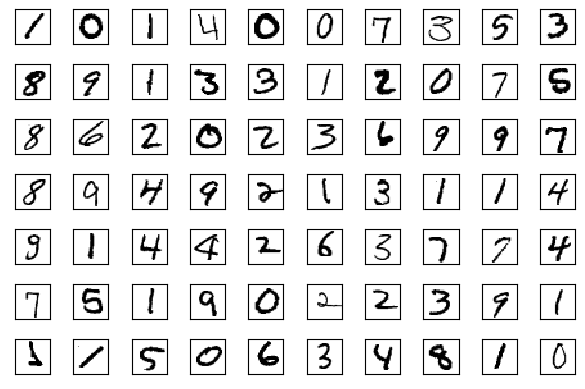

In [5]:
target = mnist['label']
mnist = mnist.drop("label",axis=1)

import matplotlib.pyplot as plt
plt.figure(dpi=100)
for i in range(0,70): #plot the first 70 images
    plt.subplot(7,10,i+1)
    grid_data = mnist.iloc[i,:].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data,cmap='gray_r', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

- Simple case: N grayscale images with $m\times n$ pixels each.
- **Mathematical Representation I**: Each image can be represented by a matrix $I\in\mathbb{R}^{m\times n}$, whose elements denotes the intensities of pixels. The whole datasets have $N$ matrices of $m$ by $n$, or represented by a $N\times m\times n$ *tensor*.

[Illustrated Introduction to Linear Algebra using NumPy](https://medium.com/@kaaanishk/illustrated-introduction-to-linear-algebra-using-numpy-11d503d244a1)
<div>
<img src="./img/1_hd0aMCRIDbyFQo5lYgb5Fw.jpeg" width="400" >
</div>

- **Mathematical representation II**: *Random field model* $z=\mathbf{f}(\omega,x,y)$.


- **Color images**: Decompose into RGB (red,green and blue) channels and 
    - use three matrices (or three-dimensional tensor) to represent one image, or 
    - build the random field model with vector-valued functions $z=\mathbf{f}(\omega,x,y)\in \mathbb{R}^{3}$
    
[convolutional neural networks](https://www.esantus.com/blog/2019/1/31/convolutional-neural-networks-a-quick-guide-for-newbies)

<div>
<img src="./img/conv_rgb.png" width="400">
</div>
- Question: Can image datasets also be transformed into tabular data? What are the pros/cons?

In [6]:
mnist.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

#### **Videos**

- *Time-series* of images, or *random field* model $z=\mathbf{f}(\omega,x,y,t)$

#### **Texts**

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['He is a good person',
          'He is bad student',
          'He is hardworking']
df = pd.DataFrame(data=corpus, columns=['sentences'])
print(df)
vectorizer = CountVectorizer(vocabulary=['he', 'is', 'a', 'good', 'person', 'bad', 'student', 'hardworking'], min_df=0,
                             stop_words=frozenset(), token_pattern=r"(?u)\b\w+\b")
X = vectorizer.fit_transform(df['sentences'].values)
result = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())
result.head()

             sentences
0  He is a good person
1    He is bad student
2    He is hardworking


he  is  a  good  person  bad  student  hardworking
0   1   1  1     1       1    0        0            0
1   1   1  0     0       0    1        1            0
2   1   1  0     0       0    0        0            1

- **Proposal I**: Tabular data by extracting key words. "Document-Term Matrix"
    - useful in sentiment analysis, document clustering, topic modelling
    - popular algorithms include tf-idf,Word2Vec,bag of words, etc.
- **Proposal II**: Time-series of individual words.
    - useful in machine translation
    
[Recurrent neural network model for machine translations](https://smerity.com/articles/2016/google_nmt_arch.html)

<div>
<img src="./img/gnmt_arch_1_enc_dec.svg" width="500">
</div>

#### **Networks**

- Concepts: node/edge/weight, directed/undirected
- **Mathematical Representation**: adjacency matrix
- Question: what about the whole datasets of networks, and time-evolving networks?

# Tasks with Data: Machine Learning

The tasks with data can often be transfromed into *machine learning* problems, which can be generally classified as:
- Supervised Learning -- "learning with training";
- Unsupervised Learning -- "learning without training";
- Reinforment Learning -- "learning by doing".

Our course will focus on the first two categories.

## **Supervised Learning**

- Given the *training dataset* $(x^{(i)},y^{(i)})$ with $y^{(i)}\in \mathbb{R}^{q}$ denotes the *labels*, the supervised learning aims to find a mapping $\mathbf{f}:\mathbb{R}^{p}\to\mathbb{R}^{q}$ such that $y^{(i)}\approx\mathbf{f}(x^{(i)})$. Then with a new observation $x^{(new)}$, we can predict that $y^{(new)}=\mathbf{f}(x^{(new)})$.

    - when $y\in\mathbb{R}$ is continuous, the problem is also called as *regression*. **Example**: Housing price prediction
    - when $y\in\mathbb{R}$ is discrete, the problem is also called as *classification*. **Example**: Handwritten digit recognization


- **Practical Strategy**: Limit the mapping $\mathbf{f}$ to certain space by parametrization $\mathbf{f(x;\theta)}$. Then define the loss function of $\theta$
<center>$L(\theta)=\sum\limits_{i=1}^{n}\ell(y^{(i)},\mathbf{f}(x^{(i)})),$ </center> where $\ell$ quantifies the "distance" between $y^{(i)}$ and $\mathbf{f}(x^{(i)})$, and a common choice is mean squre error (MSE) for continous data $\ell(y^{(i)},\mathbf{f}(x^{(i)}))=||y^{(i)}-\mathbf{f}(x^{(i)})||^{2}$. We then seek to choose the optimal $\theta$ that minimizes the loss function<center>$\theta^{*}=\mathop{\mathrm{argmin}}\limits_{\theta}L(\theta),$</center>
which can be tacked numeracally by optimzation methods (including the popular stochastic gradient descent).


- Difference choice of $\mathbf{f(x;\theta)}$ leads to various supervised learning models:
    - Linear function : Linear Regression (for regression)/Logistic Regression (for classification)
    - Composition of linear + nonlinear functions: Neural Network
    
    
- **Important Terms**:
    - **Training Data**: Both X and y are provided. The dataset which we use to fit the function.
    - **Test Data**: In principle, only X is provided (some times $y^{test}$ is also provided as the ground-truth to verify). The dataset which we generate new predictions $y^{pred}$. -- This is the final judgement of your unsupervised ML model!
    - **Validation Data**: A good-fit model on training data does not guarantee the good performance on test data. To gain more confidence before really applying to test data, we "fake" some test data as the "sample exam". To do this, we further split the original training data into new traning data and validation data, and then learn the mapping on new training data, and judge on the validation data. We may make some adjustment if the model does not perform well in the "sample exam".
    - Intuitive Understanding: Training data is like quizzes -- you want to learn the "mapping" between the question and correct answer. Test data is like your exam. Validation is like you take a sample exam before the real exam and make some "clinics" about your weakpoints.
    - See the illustration [here](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)

**Example:** The [Wisconsin breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) and low-code ML package [pycaret](https://pycaret.org/).

In [8]:
pip install pycaret #install pycaret -- it's a new package, not coming with Anaconda

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#install'


In [10]:
from sklearn.datasets import load_breast_cancer # load the dataset
X,y = load_breast_cancer(as_frame = True,return_X_y = True)

TypeError: load_breast_cancer() got an unexpected keyword argument 'as_frame'

In [ ]:
X.shape

In [ ]:
y

In this dataset, all labels are known. To mimic a real situation, we manully create train and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split # manually split into train and test by random sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
X_train.shape

In [ ]:
y_test.shape

In [ ]:
import pandas as pd
data_train = pd.concat([X_train,y_train],axis=1) # the whole data table of training

In [ ]:
from pycaret.classification import setup
from pycaret.classification import compare_models

bc = setup(data=data_train, target='target') # target is the y column name we want to predict

In [ ]:
best = compare_models() # pycaret automatically fit different ML models for you, and compare their performance on the training dataset with cross-validation!

In [ ]:
best # the best model selected by pycaret

In [ ]:
from pycaret.classification import predict_model
predict_model(best); # predict on the validation data that pycaret have selected -- sample exam!

In [ ]:
from pycaret.classification import finalize_model
best_final = finalize_model(best) # re-train the dataset with whole input training data

In [ ]:
from pycaret.classification import predict_model
predictions = predict_model(best_final, data = X_test) # make new predictions on new-coming patients, with best model selected
predictions

In [ ]:
df_compare = pd.concat([predictions['Label'],y_test],axis = 1) # compare with the ground-truth
df_compare

In [ ]:
import numpy as np
np.mean(predictions['Label'].to_numpy() == y_test.to_numpy()) # calculate the percentage of accurate prediction (accuracy)

In [ ]:
from pycaret.classification import create_model
lr = create_model('lr') # what if we only want the logistic regression model?

In [ ]:
predict_model(lr) # validation dataset -- sample exam!

In [ ]:
final_lr = finalize_model(lr)

In [ ]:
predictions_lr = predict_model(final_lr, data = X_test)
np.mean(predictions_lr['Label'].to_numpy() == y_test.to_numpy())

In [ ]:
from pycaret.classification import tune_model
tuned_lr = tune_model(lr) # fine-tuning the parameters in logistic regression

In [ ]:
predict_model(tuned_lr) # still doing the sample exam -- validation dataset

In [ ]:
final_tuned_lr = finalize_model(tuned_lr) #retrain with the whole dataset

In [ ]:
predictions_tuned_lr = predict_model(final_tuned_lr, data = X_test)
np.mean(predictions_tuned_lr['Label'].to_numpy() == y_test.to_numpy())

Let's recap the workflow above (or about general supervised learning)
- The **minimum requirement** is that we have a training dataset with both $X$ and $y$ (also called labels, targets...). We want to **fit the mapping** between $x$ and $y$ with **training dataset** (the process is indeed called training), and making predictions about the new $y$ given new $X$ in the test dataset. 
    - *Remark 1*: The true y in test dataset sometimes can also be known, so that we can know the performance the model immediately. But in general, we won't expect this.
    - *Remark 2*: In our course, just to mimic a real-world situation, sometimes we manually create (split) the train or test data.


- (Optional) We may train multiple models or one model with multiple parameters. How can we compare them and gain more confidence about the final test? Sometimes we further split the training dataset into (real) training dataset and  **validation dataset** (imagine it as the sample exam), so that we can get instant feedback because we know the true label in validation dataset.


- (Optional) During training, to be more cautious, sometimes we even make more "quizzes" -- that is called **cross-validation** (will talk about the details in the next lecture)


- (Optional) With 10 "quizzes" (10-fold cross-validation) and "one sample exam" (validation data), for instance, we finally pick up the best candidate model. Before applying to the real test dataset, we don't want to waste any sample. Therefore we **finalize** training by picking up the winner model, while updating it with all the samples (including the validation data) in the training dataset.


- Finally, applying the model to test data -- wait and see!

Of course, as a math course, we are not satisfied with merely calling functions in pycaret. In the rest of lectures this quarter, we are going to dig into details of some algorihms and learn more underlying math -- turn the black box of ML into white (at least gray) one!

## **Unsupervised Learning**

It is still challenging to give a general and rigorous definition for unsupervised learning mathematically. Let's focus on more specific tasks.

- Dimension Reducion
  
    Given $X\in \mathbb{R}^{n\times p}$, finding a mapping function $\mathbf{f}:\mathbb{R}^{p}\to \mathbb{R}^{q} (q\ll p)$ such that the low-dimensional coordinates $z^{(i)}=\mathbf{f}(x^{(i)})$ "preserve the information" about $x^{(i)}$.
  - Question: Difference with supervised learning?
  - Linear mapping: Principle Component Analysis (PCA)
  - Nonlinear mapping: Manifold Learning, Autoencoder

In [ ]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True) # Note that in the hw this week, it's not allowed to load iris data in this way!!!

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # principle component analysis, ruduce 4-dimenional data to 2-dimensional
X_pca = pca.fit_transform(X)
X_pca

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # set the seaborn theme style
figure = plt.figure(dpi=100)
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar();

- Clustering

    Given $X\in \mathbb{R}^{n\times p}$, finding a partition of the dataset into $K$ groups such that 
    - data within the same group are similiar;
    - data from different groups are dissimiliar.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0) #call k-means clustering algorithm
y_km = kmeans.fit_predict(X)
y_km # the groups assigned by algorithm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2,dpi=150, figsize=(10,4))

fig1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1],c=y_km, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Set1', 3))
fig2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Accent', 3))
ax1.set_title('K-means Clustering')
legend1 = ax1.legend(*fig1.legend_elements(), loc="best", title="Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc="best", title="Classes")
ax2.add_artist(legend2)

Question: What is the difference between clustering and classification? Can you try classification on Iris data with pycaret right now?

In [ ]:
# try classification with pycaret for Iris data by yourself!